In [8]:
import sxs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as manimation
import tensorflow as tf
import keras

In [2]:
catalog = sxs.load("catalog")

Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer


<IPython.core.display.Javascript object>


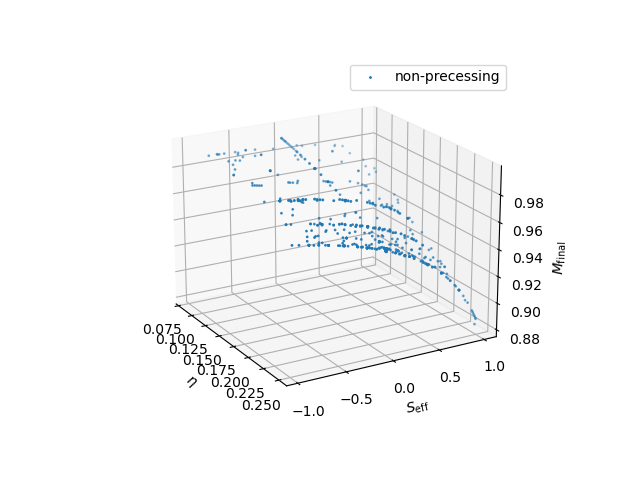

In [3]:
##### non-precessing fit ###
%matplotlib notebook

seff=[]
seff2=[]
eta=[]
eta2=[]
Mf=[]
Mf2=[]
df = catalog.table
m1=np.array(df['reference_mass1'])
m2=np.array(df['reference_mass2'])
mfinal=np.array(df['remnant_mass'])
s1=np.array(df['reference_dimensionless_spin1'])
s2=np.array(df['reference_dimensionless_spin2'])
S1=[]
S2=[]
q=[]
q2=[]
colors=[]
Sdif=[]
Sdif2=[]

for i in range (0,len(m1)):
    if mfinal[i]>0.8 and mfinal[i]<1 and np.abs(s1[i][0]+s2[i][0])<0.00001 and np.abs(s1[i][1]+s2[i][1])<0.00001:
        eta.append(m1[i]*m2[i]/(m1[i]+m2[i])**2)
        q.append(m1[i]/m2[i])
        Mf.append(mfinal[i])
        if s1[i][2]*m1[i]**2+s2[i][2]*m2[i]**2 > 0:
            seff.append(np.sqrt((s1[i][0]*m1[i]**2+s2[i][0]*m2[i]**2)**2+(s1[i][1]*m1[i]**2+s2[i][1]*m2[i]**2)**2+(s1[i][2]*m1[i]**2+s2[i][2]*m2[i]**2)**2)/(1.-2.*(m1[i]*m2[i]/(m1[i]+m2[i])**2)*(m1[i]+m2[i])**2))
            S1.append(s1[i][2])
            S2.append(s2[i][2])
            Sdif.append(s1[i][2]-s2[i][2])
        else:
            seff.append(-np.sqrt((s1[i][0]*m1[i]**2+s2[i][0]*m2[i]**2)**2+(s1[i][1]*m1[i]**2+s2[i][1]*m2[i]**2)**2+(s1[i][2]*m1[i]**2+s2[i][2]*m2[i]**2)**2)/(1.-2.*(m1[i]*m2[i]/(m1[i]+m2[i])**2)*(m1[i]+m2[i])**2))
            S1.append(s1[i][2])
            S2.append(s2[i][2])
            Sdif.append(s1[i][2]-s2[i][2])
    else:
        if mfinal[i]>0.8 and mfinal[i]<1:
            eta2.append(m1[i]*m2[i]/(m1[i]+m2[i])**2)
            Mf2.append(mfinal[i])
            q2.append(m1[i]/m2[i])
            if s1[i][2]*m1[i]**2+s2[i][2]*m2[i]**2 > 0:
                seff2.append(np.sqrt((s1[i][0]*m1[i]**2+s2[i][0]*m2[i]**2)**2+(s1[i][1]*m1[i]**2+s2[i][1]*m2[i]**2)**2+(s1[i][2]*m1[i]**2+s2[i][2]*m2[i]**2)**2)/(1.-2.*(m1[i]*m2[i]/(m1[i]+m2[i])**2)*(m1[i]+m2[i])**2))
                Sdif2.append(s1[i][2]-s2[i][2])
            else:
                seff2.append(-np.sqrt((s1[i][0]*m1[i]**2+s2[i][0]*m2[i]**2)**2+(s1[i][1]*m1[i]**2+s2[i][1]*m2[i]**2)**2+(s1[i][2]*m1[i]**2+s2[i][2]*m2[i]**2)**2)/(1.-2.*(m1[i]*m2[i]/(m1[i]+m2[i])**2)*(m1[i]+m2[i])**2))
                Sdif2.append(s1[i][2]-s2[i][2])
                
                
ax = plt.axes(projection='3d')

ax.scatter3D(eta,seff,Mf,s=1,label='non-precessing');

#ax.axes.set_zlim3d(bottom=0.85, top=1) 
ax.set_zlabel(r'$M_{\rm{final}}$', fontsize=10, rotation = 0)
ax.set_xlabel(r'$\eta$', fontsize=10, rotation = 0)
ax.set_ylabel(r'$S_{\rm{eff}}$', fontsize=10, rotation = 0)
#plt.locator_params(nbins=6)
ax.view_init(20, -30)
plt.legend()
plt.show()




In [4]:
# create input data

X=np.transpose(np.array([eta,seff]))
y=np.array(Mf)



In [9]:
# Create the model 

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model = keras.Sequential()
model.add(keras.layers.Dense(units = 2, activation = 'linear', input_shape=[2]))
model.add(keras.layers.Dense(units = 8192, activation = 'relu'))
model.add(keras.layers.Dense(units = 4096, activation = 'relu'))
model.add(keras.layers.Dense(units = 256, activation = 'relu'))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 8, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'linear'))
model.compile(loss='mse', optimizer=opt)

# Display the model
model.summary()

class CustomSaver(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
#        if epoch == 2:  # or save after some epoch, each k-th epoch etc.
        self.model.save("/Users/serginavarroalbalat/models2/model_{}.hd5".format(epoch))




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 8192)              24576     
_________________________________________________________________
dense_2 (Dense)              (None, 4096)              33558528  
_________________________________________________________________
dense_3 (Dense)              (None, 256)               1048832   
_________________________________________________________________
dense_4 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9

In [10]:
# Training
saver = CustomSaver()
model.fit( X, y, callbacks=[saver], epochs=10, verbose=1);

Epoch 1/10
19/19 [==============================] - 6s 281ms/step - loss: 0.2554
INFO:tensorflow:Assets written to: /Users/serginavarroalbalat/models2/model_0.hd5/assets
Epoch 2/10
19/19 [==============================] - 7s 374ms/step - loss: 0.0152
INFO:tensorflow:Assets written to: /Users/serginavarroalbalat/models2/model_1.hd5/assets
Epoch 3/10
19/19 [==============================] - 6s 343ms/step - loss: 0.0045
INFO:tensorflow:Assets written to: /Users/serginavarroalbalat/models2/model_2.hd5/assets
Epoch 4/10
19/19 [==============================] - 6s 300ms/step - loss: 0.0027
INFO:tensorflow:Assets written to: /Users/serginavarroalbalat/models2/model_3.hd5/assets
Epoch 5/10
19/19 [==============================] - 5s 282ms/step - loss: 0.0019
INFO:tensorflow:Assets written to: /Users/serginavarroalbalat/models2/model_4.hd5/assets
Epoch 6/10
19/19 [==============================] - 6s 285ms/step - loss: 0.0013
INFO:tensorflow:Assets written to: /Users/serginavarroalbalat/models2

<IPython.core.display.Javascript object>


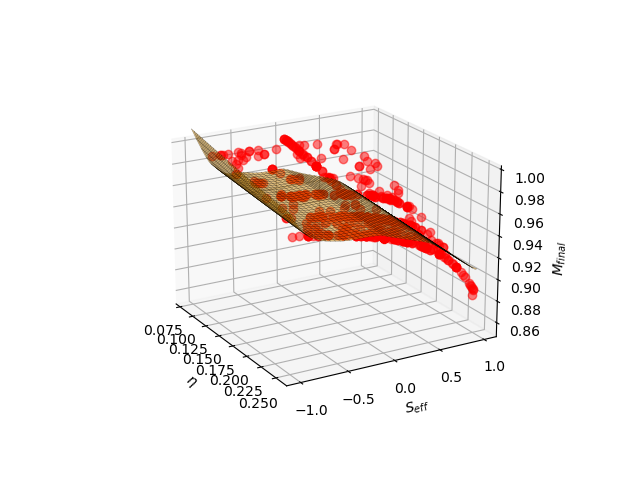

In [11]:
n = 10

# define path to ffmpeg
plt.rcParams['animation.ffmpeg_path'] = '/usr/local/bin/ffmpeg'

# Define the meta data for the movie
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='a red circle following a blue sine wave')
writer = FFMpegWriter(fps=15, metadata=metadata,bitrate=1000)

# Initialize the movie
fig, ax = plt.subplots()
ax = plt.axes(projection='3d')

# Update the frames for the movie

with writer.saving(fig, "writer_test.mp4", 500):
    for i in range(n):
        model = keras.models.load_model('/Users/serginavarroalbalat/models2/model_'+str(i)+'.hd5')

    # Display the result
        ax.clear()
        ax.axes.set_zlim3d(bottom=0.85, top=1) 
        ax.set_zlabel('$M_{final}$', fontsize=10, rotation = 0)
        ax.set_xlabel('$\eta$', fontsize=10, rotation = 0)
        ax.set_ylabel('$S_{eff}$', fontsize=10, rotation = 0)
        xdat=np.arange(0.08, 0.26, 0.005)
        ydat=np.arange(-1, 1, 0.005)
        x_plot, y_plot = np.meshgrid(xdat, ydat)

        X_plot=np.transpose(np.array([x_plot.ravel(),y_plot.ravel()]))
        y_predicted = model.predict(X_plot)
        Z = y_predicted.reshape(x_plot.shape) 
        ax.plot(X[:,0],X[:,1],y,'ro',alpha=0.5)

        ax.plot_surface(x_plot, y_plot, Z, alpha=0.5,rstride=10, cstride=1, color='orange', edgecolors='k', lw=0.1)

        ax.view_init(20, -30)

        writer.grab_frame()

In [ ]:
# don't worry about the code in this cell, it is just to let you 
# display the movies you generated above in Jupyter notebook
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="writer_test.mp4" type="video/mp4">
</video></div>""")